In [4]:
import pandas as pd

In [5]:
#Loading datasets into the program
male_players_df = pd.read_csv("C:\\Users\\User\\OneDrive - Ashesi University\\Intro to AI\\male_players.csv", low_memory = False)
players_22_df = pd.read_csv("C:\\Users\\User\\OneDrive - Ashesi University\\Intro to AI\\players_22.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_11036\1872368070.py:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_22_df = pd.read_csv("C:\\Users\\User\\OneDrive - Ashesi University\\Intro to AI\\players_22.csv")


In [6]:
#getting an initial view of the dataset by displaying the first five rows
male_players_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


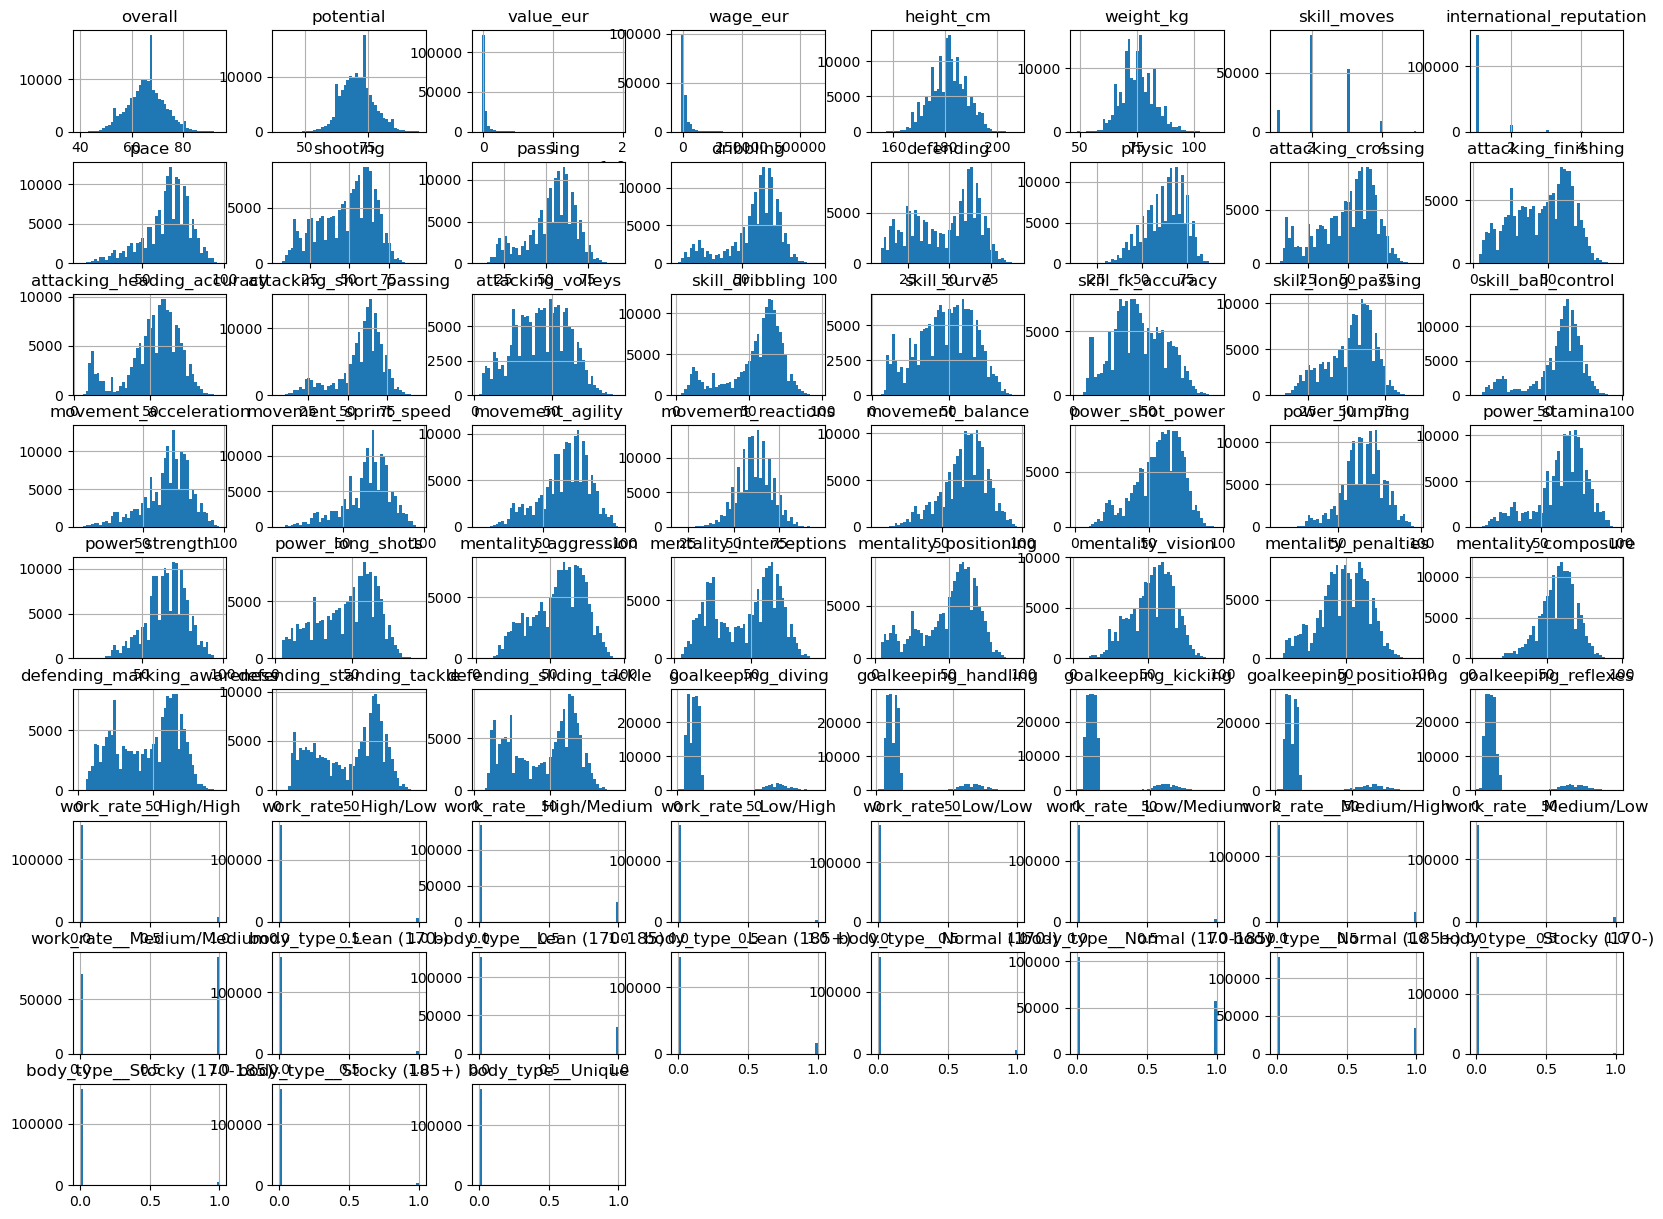

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
male_players_df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
#dropping irrelevant attributes
male_players_df.drop(['player_id','player_url','player_face_url','fifa_version','fifa_update','fifa_update_date','player_face_url','real_face','dob','club_jersey_number','club_loaned_from','club_joined_date','club_contract_valid_until_year','nationality_id','nationality_name','nation_team_id','nation_position','nation_jersey_number','preferred_foot','weak_foot','release_clause_eur','league_id','league_name','league_level','club_team_id','club_name','club_position','age'],axis=1,inplace=True)
male_players_df.drop(male_players_df.loc[:,'ls':],axis=1,inplace=True)

In [8]:
potential_drops = []
maintaining_columns = []

for col in male_players_df.columns:
    #storing the columns whose missing values are less than 30% of the dataset shape
    if((male_players_df[col].isnull().sum() < (0.3 * (male_players_df.shape[0])))):
        maintaining_columns.append(col)
        
    #storing the columns whose missing values are more than 30% of the dataset shape    
    else:
        potential_drops.append(col)

print(potential_drops)
print(maintaining_columns)

['player_tags', 'player_traits', 'goalkeeping_speed']
['short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'height_cm', 'weight_kg', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeep

In [9]:
#replaces the dataset with columns having missing values less than 30% of the dataset's shape
male_players_df = male_players_df[maintaining_columns]
male_players_df

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,height_cm,weight_kg,skill_moves,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,169,67,4,...,76,NaN,25,21,20,6,11,15,14,8
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,185,80,5,...,85,NaN,22,31,23,7,11,15,14,11
2,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,180,80,4,...,80,NaN,29,26,26,10,8,11,5,15
3,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,195,95,4,...,91,NaN,25,41,27,13,15,10,9,12
4,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,193,92,1,...,37,NaN,25,25,25,87,85,92,90,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161578,Zhao Ziye,赵梓业,RW,46,61,110000.0,700.0,180,73,2,...,54,40.0,23,21,25,9,13,13,12,7
161579,Wu Junjie,吴俊杰,LB,46,58,110000.0,750.0,188,83,2,...,31,35.0,50,51,45,6,14,8,13,14
161580,K. Barlow,Kailin Barlow,CDM,46,58,110000.0,500.0,181,73,2,...,37,35.0,36,45,50,8,9,7,14,9
161581,G. Tetteh,Gideon Tetteh,"RW, LW",46,70,150000.0,500.0,175,68,2,...,63,43.0,19,17,14,13,12,14,7,13


In [10]:
import numpy as np
#separates the dataset into non_numeric and numeric data
numeric_data = male_players_df.select_dtypes(include=np.number)
non_numeric= male_players_df.select_dtypes(include=['object'])

non_numeric

,short_name,long_name,player_positions,work_rate,body_type
0,L. Messi,Lionel Andrés Messi Cuccittini,CF,Medium/Low,Normal (170-)
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",High/Low,Normal (185+)
2,A. Robben,Arjen Robben,"RM, LM, RW",High/Low,Normal (170-185)
3,Z. Ibrahimović,Zlatan Ibrahimović,ST,Medium/Low,Normal (185+)
4,M. Neuer,Manuel Peter Neuer,GK,Medium/Medium,Normal (185+)
...,...,...,...,...,...
161578,Zhao Ziye,赵梓业,RW,Medium/Medium,Lean (170-185)
161579,Wu Junjie,吴俊杰,LB,Medium/Medium,Normal (185+)
161580,K. Barlow,Kailin Barlow,CDM,High/Medium,Normal (170-185)
161581,G. Tetteh,Gideon Tetteh,"RW, LW",Medium/Medium,Normal (170-185)


In [11]:
#uses the iterative imputer class to predict the values of the missing data in the numerical columns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
numeric_data = pd.DataFrame(np.round(imputer.fit_transform(numeric_data)), columns=numeric_data.columns)

In [12]:
#store the relevant non numeric columns
work_rate = non_numeric['work_rate']
body_type = non_numeric['body_type']

#encode the relevant non numeric columns using pandas' get dummies method
work_rate = pd.get_dummies(work_rate, prefix = 'work_rate_').astype(int)
body_type = pd.get_dummies(body_type, prefix = 'body_type_').astype(int)


#concatenate the numerical columns with the encoded columns
male_players_df = pd.concat([numeric_data,work_rate,body_type], axis=1).reset_index(drop=True)

In [13]:
#Calculate correlation matrix
corr_matrix = male_players_df.corr()['overall']
corr_matrix

overall                        1.000000
potential                      0.695362
value_eur                      0.567869
wage_eur                       0.612150
height_cm                      0.044415
                                 ...   
body_type__Normal (185+)       0.043693
body_type__Stocky (170-)       0.020177
body_type__Stocky (170-185)    0.043985
body_type__Stocky (185+)       0.030849
body_type__Unique              0.131430
Name: overall, Length: 67, dtype: float64

In [14]:
#selecting attributes with highest correlation(threshold = 0.5)
high_corr_vals = corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.5)]
high_corr_vals

overall                1.000000
potential              0.695362
value_eur              0.567869
wage_eur               0.612150
passing                0.511912
movement_reactions     0.845753
mentality_composure    0.698726
Name: overall, dtype: float64

In [15]:
#Creating feature subset with attributes having a high correlation with the target variable
feature_subsets = male_players_df[['overall','potential','value_eur','wage_eur','passing','movement_reactions','mentality_composure']]
feature_subsets

,overall,potential,value_eur,wage_eur,passing,movement_reactions,mentality_composure
0,93.0,95.0,100500000.0,550000.0,86.0,94.0,90.0
1,92.0,92.0,79000000.0,375000.0,81.0,90.0,90.0
2,90.0,90.0,54500000.0,275000.0,83.0,89.0,90.0
3,90.0,90.0,52500000.0,275000.0,81.0,85.0,91.0
4,90.0,90.0,63500000.0,300000.0,33.0,89.0,59.0
...,...,...,...,...,...,...,...
161578,46.0,61.0,110000.0,700.0,40.0,39.0,40.0
161579,46.0,58.0,110000.0,750.0,29.0,42.0,35.0
161580,46.0,58.0,110000.0,500.0,43.0,50.0,35.0
161581,46.0,70.0,150000.0,500.0,36.0,45.0,43.0


In [16]:
y = feature_subsets['overall'] #dependent variable
X = feature_subsets.drop('overall',axis=1) #independent variables

In [17]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled = scale.fit_transform(X)
scaled

array([[ 3.87531516, 16.40827125, 24.63979807,  2.30917525,  3.53577452,
         2.70430272],
       [ 3.39601316, 12.81477417, 16.64160945,  1.9546617 ,  3.09957117,
         2.70430272],
       [ 3.0764785 ,  8.71985889, 12.07121595,  2.09646712,  2.99052033,
         2.70430272],
       ...,
       [-2.0360761 , -0.37085302, -0.4745142 , -0.73964136, -1.26246241,
        -1.88275034],
       [-0.11886813, -0.36416744, -0.4745142 , -1.23596034, -1.8077166 ,
        -1.21554262],
       [-1.23723945, -0.37085302, -0.4745142 , -1.94498746, -2.3529708 ,
        -2.29975516]])

In [18]:
#Creating a dataframe from the scaled data of independent variables
X = pd.DataFrame(scaled, columns = X.columns) 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#splitting data into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify =y)

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

gb = GradientBoostingRegressor(n_estimators=100)
rf = RandomForestRegressor(n_estimators=100)
xgbmodel = xgb.XGBRegressor(n_estimators=100)



In [19]:
from sklearn.model_selection import cross_val_score
from collections import namedtuple

#Create a named tuple containing the model name and the model itself as key-value pairs
tuple_for_model = namedtuple('tuple_for_model', ['GradientBoostingRegressor','RandomForestRegressor','XGBRegressor'])
my_tuple = tuple_for_model(GradientBoostingRegressor=gb,RandomForestRegressor=rf,XGBRegressor=xgbmodel)

#Convert to dictionary
my_dict = {key: getattr(my_tuple,key) for key in my_tuple._fields}

#Train each model with cross validation score and display their RMSE
for name, model in my_dict.items():
    scores = cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
    print(f'{name} CV RMSE: {np.sqrt(-scores).mean()}')

GradientBoostingRegressor CV RMSE: 1.8173026738736504
RandomForestRegressor CV RMSE: 1.5254128173127606
XGBRegressor CV RMSE: 1.5927059057240087


In [25]:
from sklearn.model_selection import GridSearchCV
#Defining hyperparameter grids for best model
param_grid_rf = {
    'n_estimators': [50,100,150],
    'max_depth': [3,5,7],
    "max_depth": [5, 10, 15]
}



In [26]:
from sklearn.metrics import mean_squared_error
#Creating and fitting best model with GridSearchCV
rf_model = RandomForestRegressor()
rf_grid_search = GridSearchCV(rf_model,param_grid=param_grid_rf,scoring='neg_mean_squared_error',cv=5)
rf_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [27]:
print('Best Parameters:',rf_grid_search.best_params_) #determine the best parameters for the model
print('Best CV RMSE:', np.sqrt(-rf_grid_search.best_score_)) #display the best CV RMSE

Best Parameters: {'max_depth': 15, 'n_estimators': 150}
Best CV RMSE: 1.53027761364254


In [28]:
#Train and test the optimized best model
model_rf = RandomForestRegressor(max_depth = 15, n_estimators=150)
model_rf.fit(X_train,y_train)

y_pred = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred,y_test)))

1.5247681968452333


In [65]:
import pickle as pkl
pkl.dump(model_rf,open('C:\\Users\\User\\OneDrive - Ashesi University\\Intro to AI' + model_rf.__class__.__name__ + '.pkl','wb'))

In [30]:
players_22_df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [33]:
#select attributes that are relevant to the test
players_22_df = players_22_df[['overall','potential','value_eur','wage_eur','passing','movement_reactions','mentality_composure']]
players_22_df

,overall,potential,value_eur,wage_eur,passing,movement_reactions,mentality_composure
0,93,93,78000000.0,320000.0,91.0,94,96
1,92,92,119500000.0,270000.0,79.0,93,88
2,91,91,45000000.0,270000.0,80.0,94,95
3,91,91,129000000.0,270000.0,86.0,89,93
4,91,91,125500000.0,350000.0,93.0,91,89
...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,46.0,53,37
19235,47,59,110000.0,500.0,50.0,49,47
19236,47,55,100000.0,500.0,45.0,46,36
19237,47,60,110000.0,500.0,36.0,48,47


In [34]:
#checking for null values
players_22_df.isnull().sum()

overall                   0
potential                 0
value_eur                74
wage_eur                 61
passing                2132
movement_reactions        0
mentality_composure       0
dtype: int64

In [38]:
#uses the iterative imputer class to predict the values of the missing data in the dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
players_22_df = pd.DataFrame(np.round(imp.fit_transform(players_22_df)), columns=players_22_df.columns)

In [39]:
players_22_df.isnull().sum() #checking if the imputation was successful

overall                0
potential              0
value_eur              0
wage_eur               0
passing                0
movement_reactions     0
mentality_composure    0
dtype: int64

In [40]:
#splitting dataset into dependent and independent data
dependent = players_22_df['overall']
independent = players_22_df.drop('overall',axis=1)

In [41]:
#Scaling the independent attributes
scaler = StandardScaler()
scaled_data = scaler.fit_transform(independent)

In [47]:
#Converting scaled data to a dataframe
independent = pd.DataFrame(scaled_data, columns = independent.columns)
independent

,potential,value_eur,wage_eur,passing,movement_reactions,mentality_composure
0,3.601780,9.884351,15.989926,3.375067,3.599846,3.131025
1,3.437470,15.343089,13.418904,2.205881,3.489252,2.473077
2,3.273160,5.543668,13.418904,2.303313,3.599846,3.048782
3,3.273160,16.592680,13.418904,2.887906,3.046874,2.884295
4,3.273160,16.132305,17.532540,3.569931,3.268063,2.555321
...,...,...,...,...,...,...
19234,-3.134932,-0.366238,-0.413198,-1.009382,-0.934526,-1.721343
19235,-1.984762,-0.360976,-0.438908,-0.619653,-1.376903,-0.898908
19236,-2.642002,-0.362292,-0.438908,-1.106814,-1.708687,-1.803587
19237,-1.820452,-0.360976,-0.438908,-1.983704,-1.487498,-0.898908


In [51]:
#Evaluate how good the model is by testing it on completely new data
dependent_pred = model_rf.predict(independent)
test_rmse = np.sqrt(mean_squared_error(dependent_pred,dependent))
print('Test RMSE:',test_rmse)

Test RMSE: 2.3587232998544945
